In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
import numpy as np

import sys
import os

import matplotlib.colors as cols
import matplotlib.pyplot as plt

from matplotlib import colormaps
# change the default resolution
# for better looking plots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

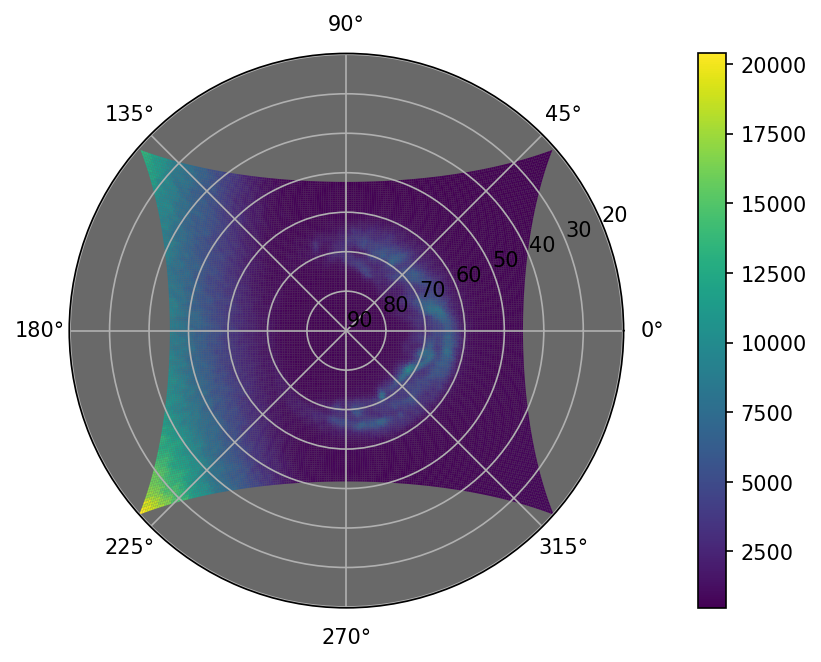

In [3]:
#add read_io module to current path ()
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))

import data_io
import data_io.plotting as dpl

In [4]:
orb_omni = r'E:/Data/IMAGE/image_orb_omni.hdf'

orb = pd.read_hdf(orb_omni)

In [5]:
orb['z_angle'] = np.rad2deg(np.arctan2(np.sqrt(orb['X-GSM']**2+orb['Y-GSM']**2),orb['Z-GSM']))

<Axes: xlabel='DateTime'>

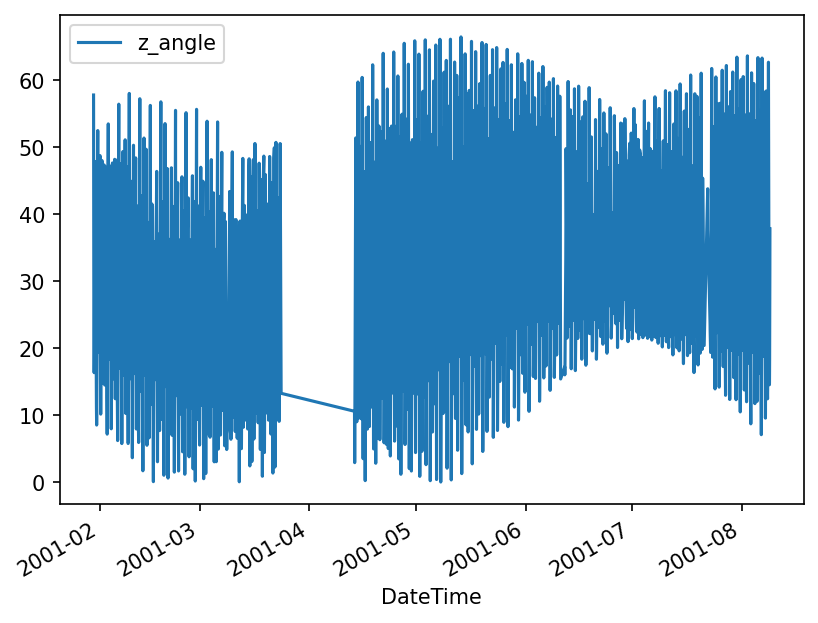

In [6]:
orb.plot(y='z_angle')

In [7]:
gd = (orb['z_angle'] < 10) & (orb['Bz_GSM'] < -4) & (orb['Bz_GSM'] > -6)

In [8]:
orb.loc[gd, ['Bz_GSM','AE','SYM_H index']].shape

(401, 3)

In [9]:
fn = orb.loc[gd,'filename'].to_list()

In [10]:
d = data_io.image.load_image_guvi(files=fn,local_dir='E:/Data/IMAGE/',grid=True)

(<PolarAxes: >,
 <matplotlib.colorbar.Colorbar at 0x19050252aa0>)

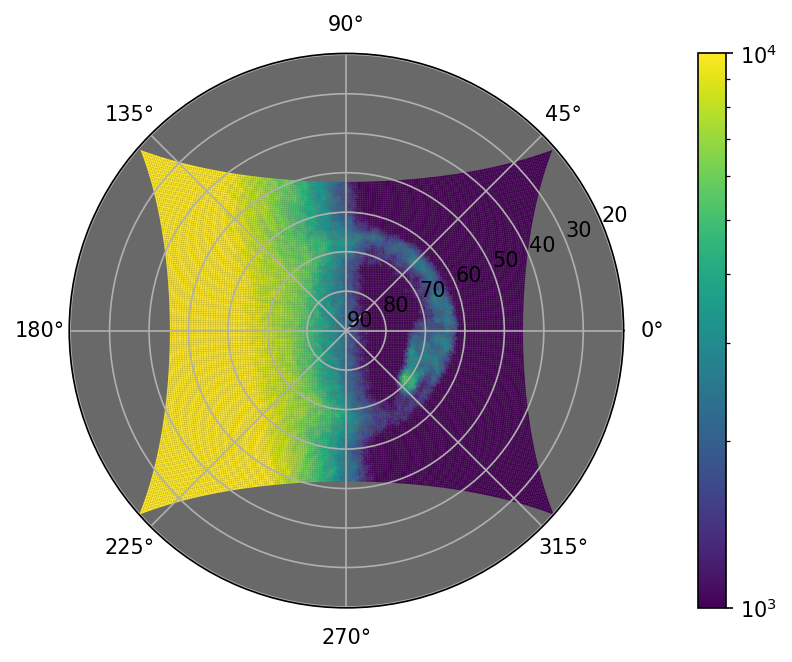

In [11]:
im = d['IM']
norm = cols.LogNorm(vmin=1000,vmax=10000)
dpl.guvi_plot(im[100,:,:].squeeze(),d['LAT_VERTS'],d['LON_VERTS'],norm=norm)

In [ ]:
# generate some images

InteractiveShell.ast_node_interactivity = "all"
norm = cols.LogNorm()
cmap = mpl.colormaps['inferno']

for i, im_p in zip(np.arange(im.shape[0]),im):
    dt = d['DateTime'][i] 
    plt.imshow(im_p[50:-20,y_arg], norm=norm,cmap=cmap)
    plt.title(f'{dt} -  {i:04}')
    plt.savefig(f'E:/Data/IMAGE/plots/{i:04}.png', bbox_inches='tight')




In [59]:
from scipy.optimize import curve_fit 
def gfit(x, A0, A1, A2, A3, A4):

    z = (x-A1)/A2

    return A0*np.exp(-0.5*(z**2)) + A3 + A4*x

def gfit_ns(x, A0, A1, A2, A3):

    z = (x-A1)/A2

    return A0*np.exp(-0.5*(z**2)) + A3

In [197]:
i_st = 152
i_en = 165

op = False

lat_c = list()
lon_c = list()
x_c = list()
y_c = list()
sig = list()
hgt = list()
cnt = list()
bas = list()

scn=0
jump=True
while scn < d['LAT_ARR'][0].shape[1]:
#for scn in np.arange(2):
    lats = d['LAT_ARR'][i_st][:,scn]
    lons = d['LON_ARR'][i_st][:,scn]

    scn_i = d['IM'][i_st][:,scn]
    scn_m = d['MLT_ARR'][i_st][:,scn]
    scn_x = (90-lats)*np.cos(np.deg2rad(lons))

    gd = np.where(scn_x > 0)

    g0 = scn_i[gd].max()-scn_i[gd].min()
    g1 = lats[gd[0][scn_i[gd].argmax()]]
    g2 = 5
    g3 = scn_i[gd].min()
    g4 = 0

    p, covariance = curve_fit(gfit_ns, lats[gd], scn_i[gd],p0=[g0,g1,g2,g3]) 
    
    p_bnd = p[1]+2*p[2]

    if p_bnd > lats[gd].max():
        if jump:
            jump=False
            # need to figure our which scan to jump to 
            # 
            mlt_nxt = d['MLT_ARR'][i_st][gd[0][10],scn:]
            scn = np.nanargmin(mlt_nxt)+scn 
            print(scn)
            continue
        else:
            break

    if op:
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(5, 2))
        ax[0].plot(lats[gd],scn_i[gd])
        ax[0].plot(lats[gd],gfit_ns(lats[gd],p[0],p[1],p[2],p[3]))
        ax[1].imshow(d['IM'][i_st])
        ax[1].plot([scn,scn],[0,scn_x.shape[0]], color='red')
        plt.show()


    # find closest point from array
    pk_id = np.abs(lats[gd]-p[1]).argmin()

    lat_c.append(lats[gd[0][pk_id]])
    lon_c.append(lons[gd[0][pk_id]])

    x_c.append(scn)
    y_c.append(gd[0][pk_id])
    hgt.append(p[0])
    cnt.append(p[1])
    sig.append(p[2])
    bas.append(p[3])

    scn += 1




84


In [176]:
x_c

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 117,
 118,
 119,
 121,
 117,
 118,
 119,
 121]

c:\Users\murph\miniconda3\envs\satdrag\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, '117')

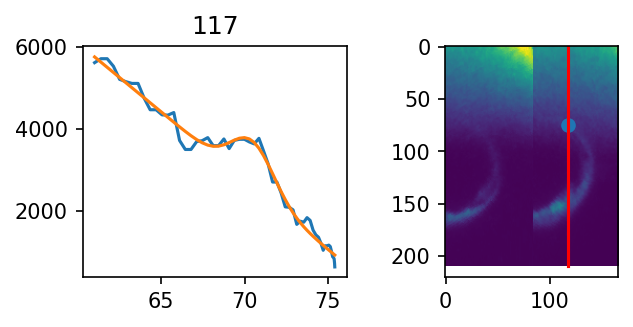

Text(0.5, 1.0, '118')

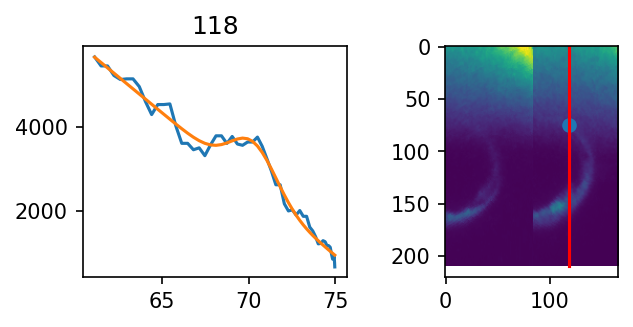

Text(0.5, 1.0, '119')

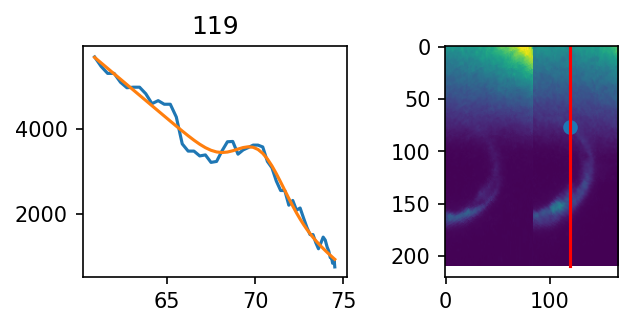

Text(0.5, 1.0, '121')

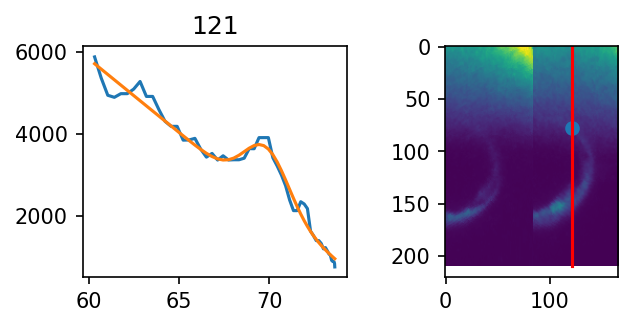

In [199]:
op=True
scn=0
jump=True


for scn, ht, ct, sg, bs in zip(x_c, hgt,cnt, sig, bas):
#for scn in np.arange(2):
    lats = d['LAT_ARR'][i_st][:,scn]
    lons = d['LON_ARR'][i_st][:,scn]

    scn_i = d['IM'][i_st][:,scn]
    scn_m = d['MLT_ARR'][i_st][:,scn]
    scn_x = (90-lats)*np.cos(np.deg2rad(lons))

    gd = np.where(scn_x < 0)

    g0 = ht
    g1 = ct
    g2 = sg
    g3 = bs
    g4 = 0

    gd = np.where((scn_x < 0) & (lats > (g1-5)) & (lats < (g1+20)))

    try:
        p, covariance = curve_fit(gfit, lats[gd], scn_i[gd],p0=[g0,g1,g2,g3,g4]) 
    except:
        continue

    if p[0] < 1000 or p[1]+3*p[2] > lats[gd].max() or p[1]-3*p[2] < lats[gd].min() or p[2] < 0:
        continue
    # find closest point from array
    pk_id = np.abs(lats[gd]-p[1]).argmin()

    lat_c.append(lats[gd[0][pk_id]])
    lon_c.append(lons[gd[0][pk_id]])
    sig.append(p[2])
    x_c.append(scn)
    y_c.append(gd[0][pk_id])

    if op:
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(5, 2))
        ax[0].plot(lats[gd],scn_i[gd])
        ax[0].plot(lats[gd],gfit(lats[gd],p[0],p[1],p[2],p[3], p[4]))
        ax[0].set_title(f'{scn}')
        ax[1].imshow(d['IM'][i_st])
        ax[1].plot([scn,scn],[0,scn_x.shape[0]], color='red')
        ax[1].scatter(scn,gd[0][pk_id])
        plt.show()


    

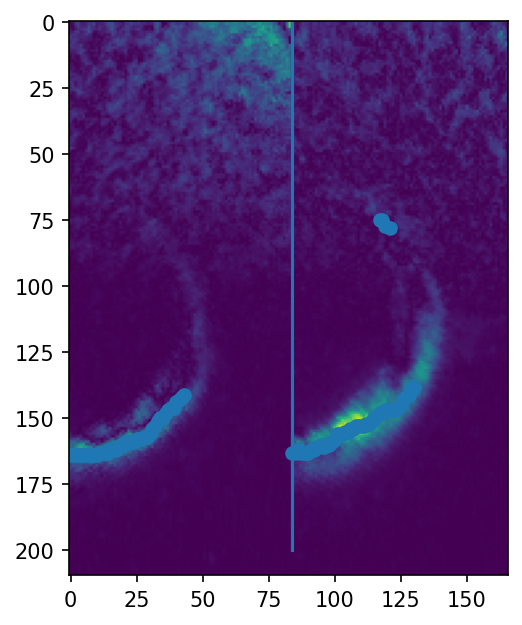

In [ ]:
fig, ax = plt.subplots()

ax.imshow(d['IM'][i_st])
ax.plot(x_c,y_c,)
ax.plot([84,84],[0,200])

In [205]:
ell.return_fit(180).shape

(180, 2)

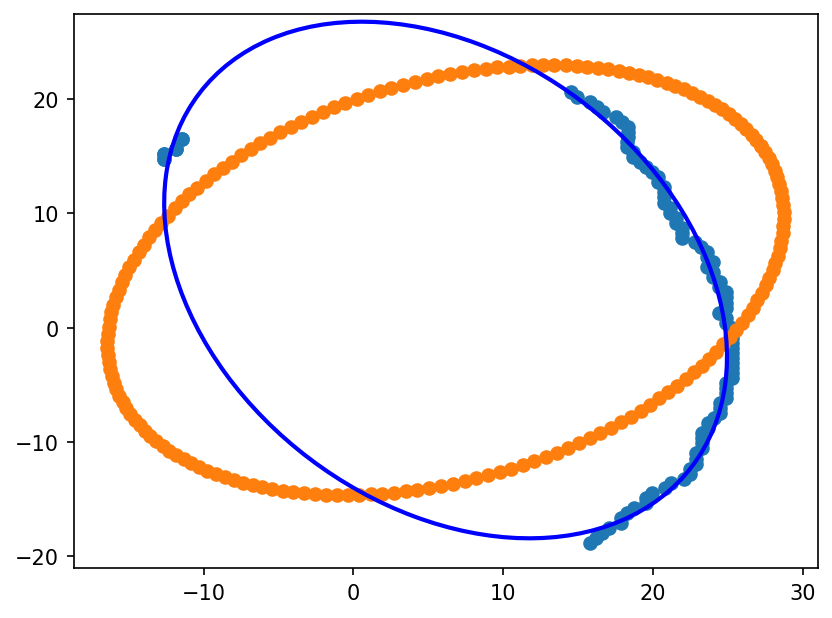

In [189]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.scatter(xm,ym)

ellipse = Ellipse(
        xy=e_c, width=2*sx, height=2*sy, angle=np.rad2deg(e_a),
        edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
ax.add_patch(ellipse)

In [194]:
e_a

2.078354529829501

In [207]:
def compute_a(points):
  n = len(points)
  value = np.ones((n, 3))
  for i in range(n):
    x, y = points[i]
    value[i, 0] = -2*x
    value[i, 1] = -2*y
  return value

a: 2.871010271236102
b: -0.4016981158213946
k: -490.7053553789002
r: 22.340756852280048


In [219]:
circle1 = plt.Circle((a, b), r, color='r', fill=False).get_verts()

In [226]:
from matplotlib import rcParams
rcParams['lines.markersize']

6.0

In [ ]:
from ellipse import LsqEllipse

# convert to cartesian for fitting
# and add to single array
x = (90-(np.array(lat_c)+2*np.array(sig)))*np.cos(np.deg2rad(lon_c))
y = (90-(np.array(lat_c)+2*np.array(sig)))*np.sin(np.deg2rad(lon_c))



Xf = np.array(list(zip(x, y)))

# circle fit
A = compute_a(Xf)
Y = np.sum(np.square(Xf), axis=-1)
Y = -Y
a, b, k = (np.linalg.inv(A.T @ A) @ A.T) @ Y
print(f"a: {a}")
print(f"b: {b}")
print(f"k: {k}")
r = np.sqrt(a**2 + b**2 - k)
print(f"r: {r}")

# fit
ell = LsqEllipse().fit(Xf)
e_c, sx, sy, e_a = ell.as_parameters()

e_a = e_a*-1
# derive ellipse use 2 degree spacing
phi = np.deg2rad(np.arange(0, 181)*2)

xm = e_c[0] + sx*np.cos(phi)*np.cos(e_a) + sy*np.sin(phi)*np.sin(e_a)
ym = e_c[1] - sx*np.cos(phi)*np.sin(e_a) + sy*np.sin(phi)*np.cos(e_a)

elat = 90-np.sqrt(xm**2+ym**2)
elon = np.arctan2(ym, xm)

vv = ell.return_fit(180)
vlat = 90-np.sqrt(vv[:,0]**2+vv[:,1]**2)
vlon = np.arctan2(vv[:,1],vv[:,0])

ax, p_col, c_bar = dpl.guvi_plot(d['IM'][i_st].squeeze(),d['LAT_VERTS'],d['LON_VERTS'],norm=norm)
ax.scatter(np.deg2rad(lon_c),lat_c)
ax.scatter(np.deg2rad(lon_c),lat_c+2*np.array(sig))
ax.scatter(elon,elat,2)
ax.scatter(vlon,vlat,2)
circle1 = plt.Circle((a, b), r, color='r', fill=False).get_verts()
ax.scatter(np.arctan2(circle1[:,1],circle1[:,0]), 90-np.sqrt(circle1[:,0]**2+circle1[:,1]**2), 2)



a: 2.9739570041232186
b: -0.5814270508263746
k: -312.83343309138985
r: 17.944801775700842


In [ ]:
a = np.where(scn_x > 0)

In [ ]:
plt.plot(scn_m,im_s)

In [ ]:
from skimage import feature

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image = ed_im
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(
    image,
    mu=0.25,
    lambda1=1,
    lambda2=1,
    tol=1e-3,
    max_num_iter=200,
    dt=0.5,
    init_level_set="checkerboard",
    extended_output=True,
)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
plt.imshow(im[5,:,0:84])

In [ ]:
%%timeit

for slc_f, slc_d in zip(imf.transpose(), im0.transpose()):
    id_nan = idx[~slc_f]
    id_fin = idx[slc_f]
    for id in id_nan:
        id_close = np.abs(id_fin-id).argmin() 
        slc_d[id] = slc_d[id_fin[id_close]]
    

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(d['IM'][-40],vmin=1000,vmax=10000)

In [ ]:
import matplotlib.colors as cols
norm = cols.LogNorm()
cmap=plt.cm.inferno

In [ ]:
guvi_plot(im0,d['LAT_VERTS'],d['LON_VERTS'])

In [ ]:
guvi_plot(d['IM'][0],d['LAT_VERTS'],d['LON_VERTS'])

In [ ]:
d.keys()
d['LAT_ARR'].shape

In [ ]:
plt.plot(im0[105:-1,100])
plt.plot(im0[0:105,100])